In [136]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from typing import List, Tuple, Dict, Optional
import ast
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pickle

# Load Spotify Dataset

In [137]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vatsalmavani/spotify-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/spotify-dataset


In [138]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("musicblogger/spotify-music-data-to-identify-the-moods")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/spotify-music-data-to-identify-the-moods


# **Music mood cluster**

In [139]:
df_labeled = pd.read_csv('/kaggle/input/spotify-music-data-to-identify-the-moods/data_moods.csv')
df_unlabeled = pd.read_csv('/kaggle/input/spotify-dataset/data/data.csv')

In [140]:
df_labeled.head()

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,1999,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,1982-10-27,68,379266,0.866,0.13700,0.730,0.000000,0.0843,0.625,-8.201,0.0767,118.523,5,4,Happy
1,23,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,2007-04-16,43,318800,0.381,0.01890,0.832,0.196000,0.1530,0.166,-5.069,0.0492,120.255,8,4,Sad
2,9 Crimes,9,Damien Rice,5GZEeowhvSieFDiR8fQ2im,2006-11-06,60,217946,0.346,0.91300,0.139,0.000077,0.0934,0.116,-15.326,0.0321,136.168,0,4,Sad
3,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,1984-08-21,2,233000,0.466,0.08900,0.438,0.000006,0.1130,0.587,-12.858,0.0608,193.100,4,4,Happy
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,47IWLfIKOKhFnz1FUEUIkE,2004-01-01,60,268000,0.419,0.00171,0.932,0.000000,0.1370,0.445,-3.604,0.1060,169.881,1,4,Energetic


In [141]:
df_unlabeled.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [142]:
# Chọn các features để huấn luyện mô hình
features = ['danceability', 'acousticness', 'energy', 'instrumentalness', 
           'liveness', 'valence', 'loudness', 'speechiness', 'tempo']

## **Data split for train/test**

In [143]:
# Chuẩn bị dữ liệu huấn luyện
X = df_labeled[features]
y = df_labeled['mood']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [144]:
# Chuẩn hóa features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [145]:
# Huấn luyện mô hình Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [146]:
# Đánh giá mô hình
y_pred = rf_model.predict(X_test_scaled)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

        Calm       0.97      0.95      0.96        41
   Energetic       0.71      0.75      0.73        32
       Happy       0.50      0.48      0.49        25
         Sad       0.88      0.88      0.88        40

    accuracy                           0.80       138
   macro avg       0.76      0.76      0.76       138
weighted avg       0.80      0.80      0.80       138



In [147]:
# Chuẩn bị dữ liệu chưa gán nhãn để dự đoán
# Đảm bảo thứ tự và tên các cột giống với tập huấn luyện
X_unlabeled = df_unlabeled[features]
X_unlabeled_scaled = scaler.transform(X_unlabeled)

In [148]:
# Dự đoán mood cho dataset chưa gán nhãn
predictions = rf_model.predict(X_unlabeled_scaled)

In [149]:
# Thêm dự đoán vào dataset gốc
df_unlabeled['mood'] = predictions

In [150]:
df_unlabeled.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,mood
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,Calm
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,Sad
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339,Calm
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109,Sad
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,Sad


In [151]:
# Hiển thị feature importance
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
})
print("\nFeature Importance:")
print(feature_importance.sort_values('importance', ascending=False))


Feature Importance:
            feature  importance
3  instrumentalness    0.224547
2            energy    0.201723
6          loudness    0.155280
1      acousticness    0.147068
5           valence    0.072466
7       speechiness    0.063766
0      danceability    0.058714
8             tempo    0.038962
4          liveness    0.037474


In [152]:
# Lưu kết quả
df_unlabeled.to_csv('music_with_mood.csv', index=False)

# **Music Recommendation system**

In [153]:
# Load the dataset
import pandas as pd
df = pd.read_csv("/kaggle/working/music_with_mood.csv") 
df = df.sample(n=15000,random_state=42).reset_index(drop=True)
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,mood
0,0.910,1977,0.500,['Idris Muhammad'],0.894,273067,0.5210,0,0KdzyvsBqX1HV3uLxGm2JV,0.772,4,0.068,-7.048,1,Camby Bolongo,34,1977,0.0847,126.805,Sad
1,0.583,1976,0.930,['Stan Getz'],0.585,182200,0.2720,0,1f4eO5waC6glPLXUhYKLm2,0.115,11,0.128,-16.693,0,Just One of Those Things,26,1976,0.0802,90.104,Sad
2,0.647,1994,0.157,"['Warren G', 'The Twinz']",0.878,179933,0.5200,1,1X07ZfF5KQt8dyJ5kAkVAQ,0.000,7,0.173,-12.609,1,Recognize,38,1994-06-07,0.4030,90.744,Happy
3,0.196,1957,0.937,['Red Garland Quintet'],0.463,925947,0.2870,0,5wmMDeM4qvLfwqLa2cvoks,0.837,0,0.112,-11.758,0,Soul Junction,13,1957,0.0363,186.764,Calm
4,0.422,1921,0.995,['Ignacio Corsini'],0.648,154240,0.0995,0,0SK1upzAP6NvIgF0uGh6z2,0.846,11,0.112,-22.429,1,Flor Marchita - Remasterizado,0,1921-03-20,0.1050,71.978,Calm


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   valence           15000 non-null  float64
 1   year              15000 non-null  int64  
 2   acousticness      15000 non-null  float64
 3   artists           15000 non-null  object 
 4   danceability      15000 non-null  float64
 5   duration_ms       15000 non-null  int64  
 6   energy            15000 non-null  float64
 7   explicit          15000 non-null  int64  
 8   id                15000 non-null  object 
 9   instrumentalness  15000 non-null  float64
 10  key               15000 non-null  int64  
 11  liveness          15000 non-null  float64
 12  loudness          15000 non-null  float64
 13  mode              15000 non-null  int64  
 14  name              15000 non-null  object 
 15  popularity        15000 non-null  int64  
 16  release_date      15000 non-null  object

In [155]:
from sklearn.preprocessing import StandardScaler

# Chọn các đặc trưng số cần thiết cho bài toán phân cụm
# "valence" (độ sáng của âm nhạc), "danceability" (khả năng nhảy theo nhạc),
# "energy" (mức năng lượng), "tempo" (nhịp điệu), 
# "acousticness" (độ mộc), "liveness" (sự sống động),
# "speechiness" (độ nói), "instrumentalness" (khả năng không có lời bài hát).
numerical_features = [
    "valence", "danceability", "energy", "tempo", 
    "acousticness", "liveness", "speechiness", "instrumentalness"
]

# Chuẩn hóa các đặc trưng số
# - Trung bình = 0
# - Độ lệch chuẩn = 1
scaler = StandardScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(df[numerical_features]), 
    columns=numerical_features                    
)

In [156]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df_scaled, test_size=0.2, random_state=42)

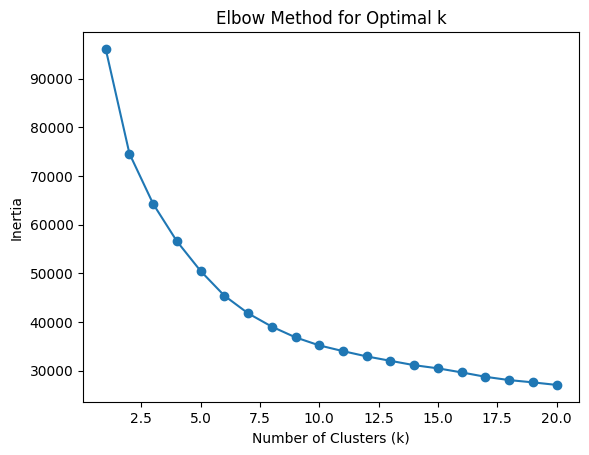

In [157]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


# Xác định số lượng cụm k tối ưu
inertia = []
k_values = range(1, 21)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(train_data)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

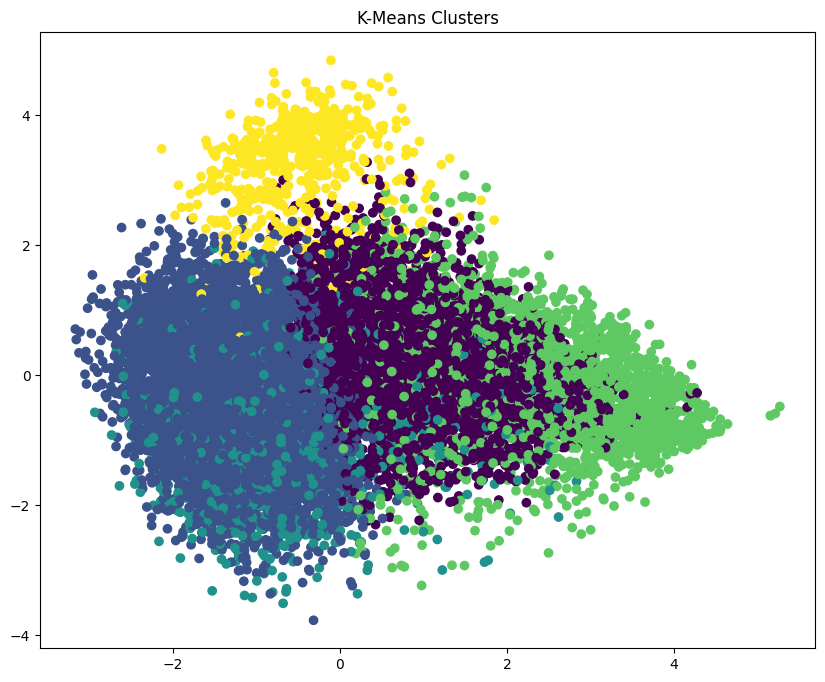

In [158]:
# Áp dụng thuật toán K-Means với số cụm k tối ưu 
optimal_k = 5  # Số cụm tối ưu
kmeans = KMeans(n_clusters=optimal_k, random_state=42)  # Khởi tạo mô hình K-Means
df["Cluster"] = kmeans.fit_predict(df_scaled)  # Gán nhãn cụm cho từng dòng dữ liệu

# Trực quan hóa các cụm bằng PCA (Phân tích thành phần chính)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Giảm dữ liệu xuống 2 chiều để trực quan hóa
pca_result = pca.fit_transform(df_scaled)  # Áp dụng PCA trên dữ liệu đã chuẩn hóa

# Vẽ biểu đồ các cụm
plt.figure(figsize=(10, 8))  # Đặt kích thước biểu đồ
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df["Cluster"], cmap="viridis")  
# Mỗi cụm có màu sắc riêng (cmap="viridis")
plt.title("K-Means Clusters")  # Tiêu đề biểu đồ
plt.show()  # Hiển thị biểu đồ

In [159]:
# df

In [160]:
# from sklearn.metrics.pairwise import cosine_similarity
# import numpy as np

# def recommend_songs(song_name, df, num_recommendations=5):
#     # Xác định cụm của bài hát đầu vào:
#     song_cluster = df[df["name"] == song_name]["Cluster"].values[0]

#     # Lọc các bài hát cùng cụm:
#     same_cluster_songs = df[df["Cluster"] == song_cluster]

#     # Tính độ tương đồng (cosine similarity):
#     song_index = same_cluster_songs[same_cluster_songs["name"] == song_name].index[0]
#     cluster_features = same_cluster_songs[numerical_features]
#     similarity = cosine_similarity(cluster_features, cluster_features)

#     # Lấy các bài hát tương đồng nhất:
#     similar_songs = np.argsort(similarity[song_index])[-(num_recommendations + 1):-1][::-1]
#     recommendations = same_cluster_songs.iloc[similar_songs][["name", "year", "artists"]]

#     return recommendations

In [161]:
# input_song =  "Camby Bolongo"
# recommended_songs = recommend_songs(input_song, df, num_recommendations=5)

# print(f"Songs similar to '{input_song}':")
# recommended_songs

In [162]:
# input_song = "Recognize"
# recommended_songs = recommend_songs(input_song, df, num_recommendations=5)

# print(f"Songs similar to '{input_song}':")
# recommended_songs

In [163]:
# save df
df.to_csv("clustered_df.csv")

## **Utility matrix**

In [164]:
# Tạo ma trận utility từ các features
def create_utility_matrix(df):
    # Chọn các features cho content-based filtering
    features = [
        "valence", "danceability", "energy", "tempo", 
        "acousticness", "liveness", "speechiness", "instrumentalness"
    ]
    
    # Chuẩn hóa features
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(df[features])
    
    # Tạo ma trận utility với index là tên bài hát và columns là features
    utility_matrix = pd.DataFrame(
        features_scaled,
        index=df['name'],
        columns=features
    )
    
    return utility_matrix

## **Item profile**

In [165]:
def create_item_profiles(df):
    # Tạo item profiles bao gồm cả thông tin về cluster và các đặc trưng khác
    item_profiles = df[['name', 'artists', 'year', 'Cluster']].copy()
    
    # Thêm các features đã chuẩn hóa từ utility matrix
    utility_matrix = create_utility_matrix(df)
    item_profiles = item_profiles.join(utility_matrix, on='name')
    
    return item_profiles

## **Compute similarity matrix**

In [166]:
def compute_similarity_matrix(utility_matrix):
    # Tính ma trận similarity giữa các bài hát
    similarity_matrix = cosine_similarity(utility_matrix)
    
    # Chuyển về DataFrame để dễ truy xuất
    similarity_df = pd.DataFrame(
        similarity_matrix,
        index=utility_matrix.index,
        columns=utility_matrix.index
    )
    
    return similarity_df

## **Recommend**

In [167]:
def recommend_songs(song_name, item_profiles, similarity_matrix, n_recommendations=5):
    """
    Đưa ra gợi ý dựa trên content-based filtering
    """
    # Kiểm tra xem bài hát có trong dataset không
    if song_name not in similarity_matrix.index:
        return "Bài hát không có trong dataset"
    
    # Lấy cluster của bài hát input
    song_cluster = item_profiles[item_profiles['name'] == song_name]['Cluster'].iloc[0]
    
    # Lấy danh sách các bài hát cùng cluster
    same_cluster_songs = item_profiles[item_profiles['Cluster'] == song_cluster]
    
    # Lọc ma trận similarity cho các bài hát cùng cluster
    cluster_similarities = similarity_matrix.loc[song_name][same_cluster_songs['name']]
    
    # Sắp xếp theo độ tương đồng và lấy n bài hát có độ tương đồng cao nhất
    most_similar = cluster_similarities.sort_values(ascending=False)[1:n_recommendations+1]
    
    # Tạo DataFrame kết quả với thông tin chi tiết
    recommendations = item_profiles[item_profiles['name'].isin(most_similar.index)].copy()
    recommendations['similarity_score'] = most_similar.values
    
    return recommendations[['name', 'artists', 'year', 'similarity_score']]

In [168]:
# Tạo các ma trận và profiles
utility_matrix = create_utility_matrix(df)
item_profiles = create_item_profiles(df)
similarity_matrix = compute_similarity_matrix(utility_matrix)

In [169]:
utility_matrix

,valence,danceability,energy,tempo,acousticness,liveness,speechiness,instrumentalness
name,,,,,,,,
Camby Bolongo,1.465967,2.029938,0.155119,0.306792,-0.006586,-0.783828,-0.098610,1.930762
Just One of Those Things,0.218538,0.270634,-0.771388,-0.876383,1.132588,-0.441825,-0.125297,-0.165403
Recognize,0.462683,1.938841,0.151398,-0.855750,-0.915275,-0.185323,1.788988,-0.532312
Soul Junction,-1.257777,-0.423978,-0.715575,2.239763,1.151133,-0.533026,-0.385635,2.138145
Flor Marchita - Remasterizado,-0.395640,0.629327,-1.413246,-1.460733,1.304788,-0.533026,0.021774,2.166859
...,...,...,...,...,...,...,...,...
Pressure,-0.014163,-0.264559,1.416509,-0.184906,-1.330946,-0.670967,-0.289565,0.517366
That's All Right - Single Version,-0.109532,-0.167769,-0.860690,-1.386424,0.369607,0.487283,-0.394530,-0.532169
El Cobarde - Versión Banda,0.973862,-1.044574,-0.138833,1.804095,-0.107257,-0.065622,-0.264064,-0.532312


In [170]:
item_profiles

,name,artists,year,Cluster,valence,danceability,energy,tempo,acousticness,liveness,speechiness,instrumentalness
0,Camby Bolongo,['Idris Muhammad'],1977,1,1.465967,2.029938,0.155119,0.306792,-0.006586,-0.783828,-0.098610,1.930762
1,Just One of Those Things,['Stan Getz'],1976,0,0.218538,0.270634,-0.771388,-0.876383,1.132588,-0.441825,-0.125297,-0.165403
2,Recognize,"['Warren G', 'The Twinz']",1994,1,0.462683,1.938841,0.151398,-0.855750,-0.915275,-0.185323,1.788988,-0.532312
3,Soul Junction,['Red Garland Quintet'],1957,3,-1.257777,-0.423978,-0.715575,2.239763,1.151133,-0.533026,-0.385635,2.138145
4,Flor Marchita - Remasterizado,['Ignacio Corsini'],1921,3,-0.395640,0.629327,-1.413246,-1.460733,1.304788,-0.533026,0.021774,2.166859
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,Pressure,['Staind'],2001,1,-0.014163,-0.264559,1.416509,-0.184906,-1.330946,-0.670967,-0.289565,0.517366
14996,That's All Right - Single Version,['Jimmy Rogers'],1976,0,-0.109532,-0.167769,-0.860690,-1.386424,0.369607,0.487283,-0.394530,-0.532169
14997,El Cobarde - Versión Banda,['José Alfredo Jimenez'],1971,1,0.973862,-1.044574,-0.138833,1.804095,-0.107257,-0.065622,-0.264064,-0.532312
14998,(I've) Got A Right To Love My Baby,['B.B. King'],1960,0,0.214723,-0.702961,-0.157437,-1.175392,0.608038,-0.761598,-0.296088,-0.532312


In [171]:
similarity_matrix

name,Camby Bolongo,Just One of Those Things,Recognize,Soul Junction,Flor Marchita - Remasterizado,Freak in You,ST 100/6,Madama Butterfly / Act 2: Ora a noi. Sedete qui,My Babe,Big Money,...,Midnight Blue - Remastered,Beep Me 911 (feat. 702 & Magoo),Green Eyes,Nice Work If You Can Get It,Caroline,Pressure,That's All Right - Single Version,El Cobarde - Versión Banda,(I've) Got A Right To Love My Baby,Solo Se Que Fue En Marzo
name,,,,,,,,,,,,,,,,,,,,,
Camby Bolongo,1.000000,0.090313,0.336327,0.202417,0.418238,-0.642083,-0.298733,-0.606058,0.079643,-0.172744,...,0.220456,0.561455,0.009820,0.125756,-0.312581,0.164586,-0.395920,-0.142139,-0.321218,0.614576
Just One of Those Things,0.090313,1.000000,0.032183,-0.088563,0.651290,-0.087383,0.546275,0.582976,0.512507,-0.933355,...,0.044269,-0.210603,-0.401219,0.560074,-0.836946,-0.603865,0.661551,-0.366668,0.688852,0.257674
Recognize,0.336327,0.032183,1.000000,-0.558455,-0.013461,-0.068847,0.062613,-0.349542,0.336035,-0.352956,...,0.002256,0.674174,0.373255,-0.157000,-0.004253,0.061673,-0.030249,-0.447927,-0.173142,0.545446
Soul Junction,0.202417,-0.088563,-0.558455,1.000000,0.352126,-0.222497,-0.156846,0.121049,-0.653367,0.285184,...,0.272396,-0.445234,-0.738596,0.335084,-0.159118,-0.157046,-0.448035,0.253852,-0.361280,-0.456445
Flor Marchita - Remasterizado,0.418238,0.651290,-0.013461,0.352126,1.000000,-0.042933,0.337539,0.424110,0.124246,-0.651441,...,-0.248271,-0.335441,-0.545992,0.177863,-0.705313,-0.295606,0.354358,-0.590542,0.238187,-0.042209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pressure,0.164586,-0.603865,0.061673,-0.157046,-0.295606,0.254132,-0.124670,-0.484994,0.083443,0.544988,...,-0.323501,0.379553,0.701722,-0.665325,0.554419,1.000000,-0.467409,-0.054242,-0.079411,-0.102037
That's All Right - Single Version,-0.395920,0.661551,-0.030249,-0.448035,0.354358,0.423457,0.579647,0.691777,0.443468,-0.686337,...,-0.309817,-0.361726,-0.083281,0.078011,-0.354861,-0.467409,1.000000,-0.446844,0.623480,0.031659
El Cobarde - Versión Banda,-0.142139,-0.366668,-0.447927,0.253852,-0.590542,-0.392485,-0.583621,-0.276855,-0.552398,0.534865,...,0.481849,-0.044942,0.058526,0.359324,0.084205,-0.054242,-0.446844,1.000000,-0.187740,-0.062778


In [172]:
def get_recommendations(song_name, n_recommendations=5):
    recommendations = recommend_songs(
        song_name,
        item_profiles,
        similarity_matrix,
        n_recommendations
    )
    print(f"\nRecommendations for '{song_name}':")
    return recommendations

In [173]:
test_song = "Love"
get_recommendations(test_song)


Recommendations for 'Love':


,name,artists,year,similarity_score
5681,Another Used To Be,['Joe'],2003,0.987253
8855,Sunlight On Your Skin - Bonus Track,"['Lil Peep', 'ILOVEMAKONNEN']",2018,0.986367
10417,Babylon,['David Gray'],1998,0.984866
13265,Ghost,['Mystery Skulls'],2014,0.978399
13495,Birds,['Imagine Dragons'],2018,0.975644
